In [1]:
import numpy as np
from Utils.discrete_family import discrete_family
from Utils.barrier_affine import solve_barrier_tree, solve_barrier_tree_nonneg, solve_barrier_tree_box_PGD
from CART import RegressionTree
from scipy.interpolate import interp1d
from scipy.stats import multivariate_normal as mvn
from Utils.plotting import  *
from Utils.simulation_helpers import *

## Testing Approximate Reference

In [24]:
n = 50
p = 5
X = np.random.normal(size=(n, p))
a = 1
b = 1

mu = b * ((X[:, 0] <= 0) * (1 + a * (X[:, 1] > 0) + (X[:, 2] * X[:, 1] <= 0)))
sd = 3
noise_sd = 0.5
y = mu + np.random.normal(size=(n,), scale=sd)
# Create and train the regression tree
reg_tree = RegressionTree(min_samples_split=10, max_depth=5, min_proportion=0.2)
reg_tree.fit(X, y, sd = noise_sd)

In [25]:
reg_tree.fit(X, y, sd = noise_sd)

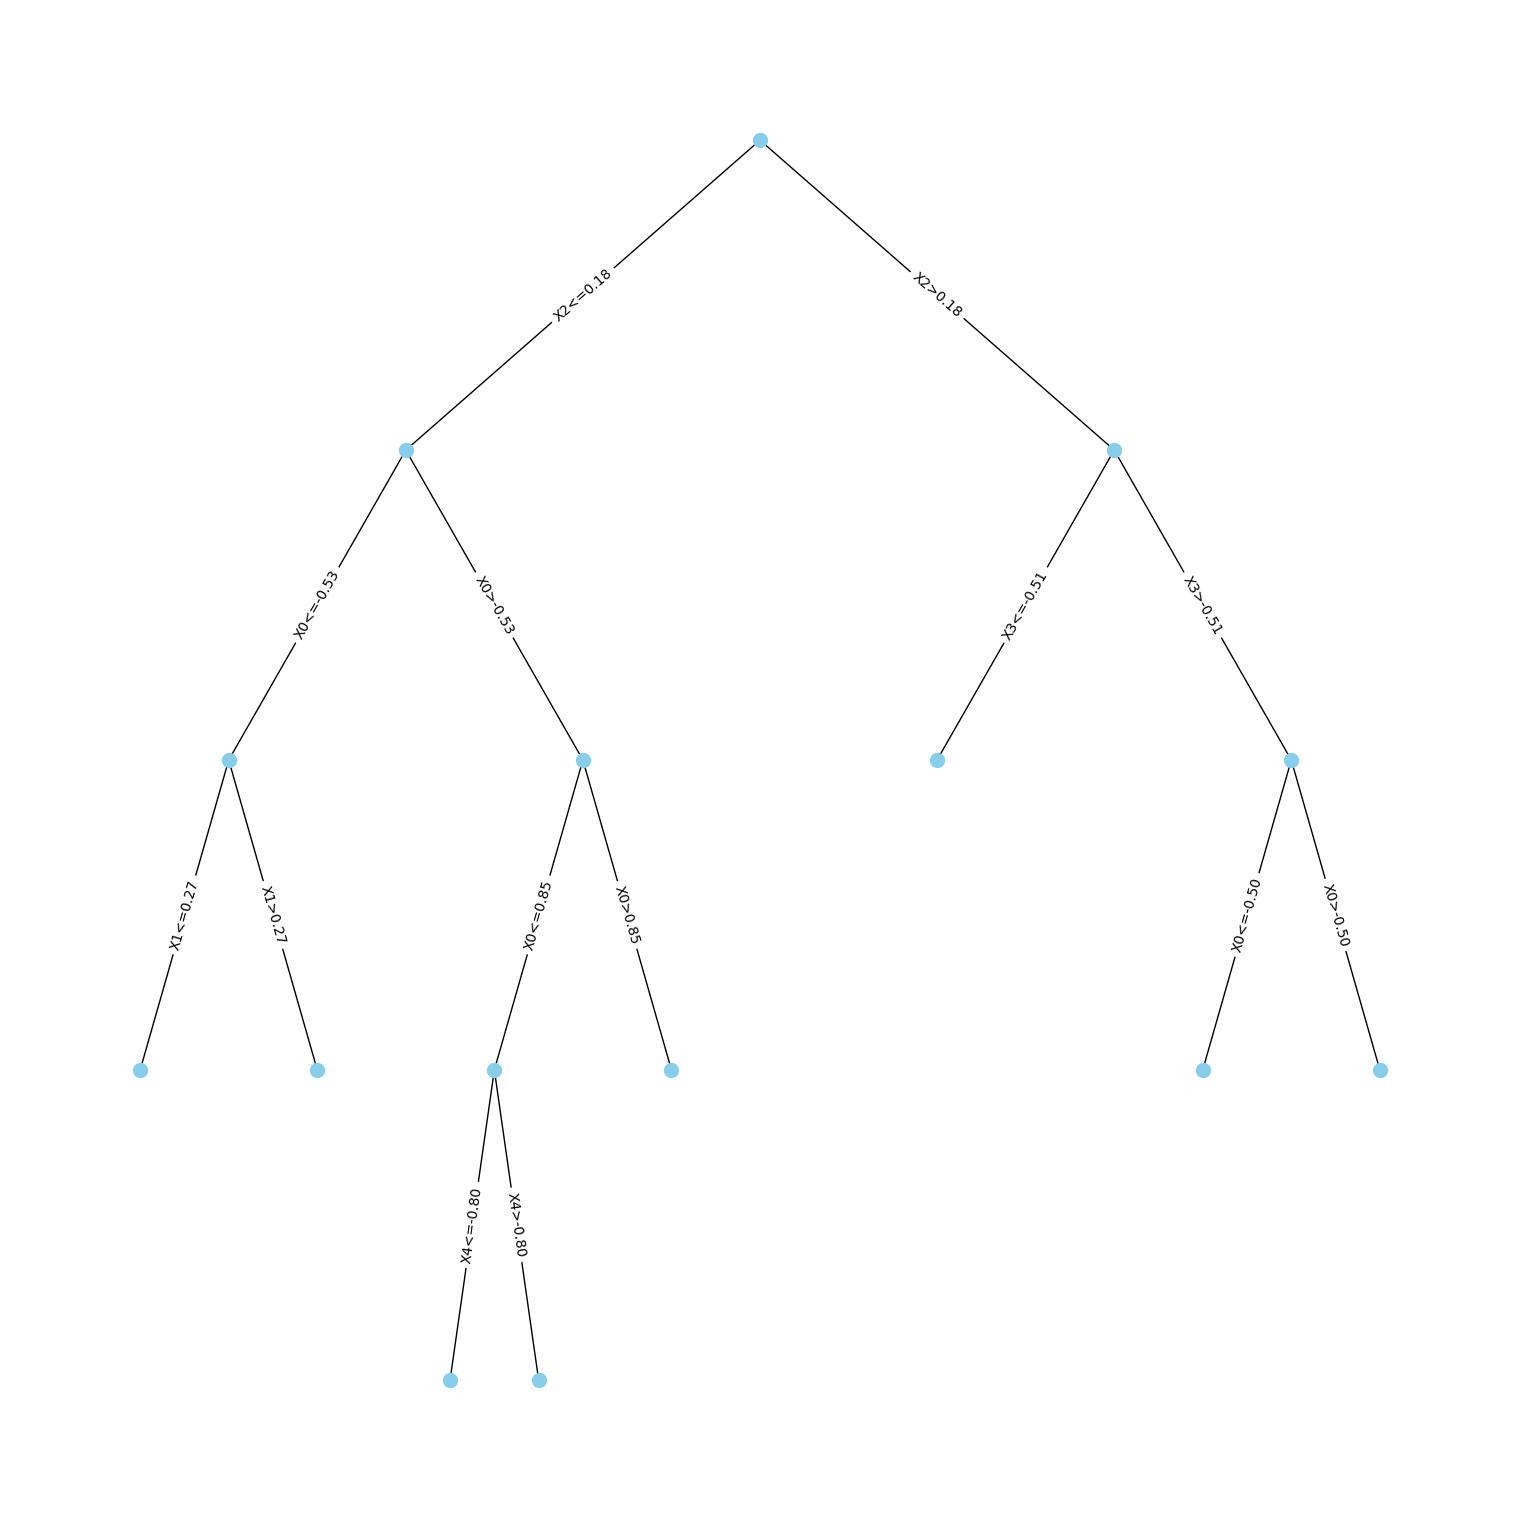

In [26]:
draw_tree(reg_tree.root)

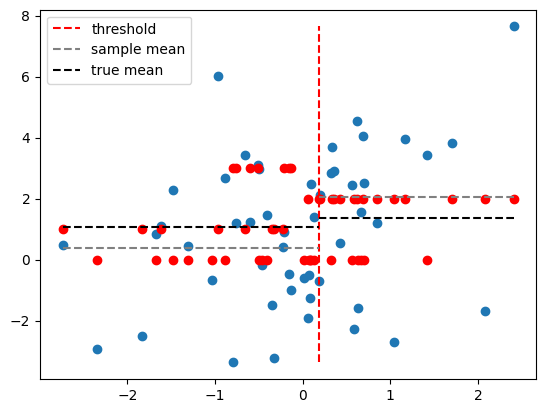

In [27]:
print_split_info(reg_tree.root, X, y, mu)

In [28]:
pval, dist, contrast, norm_contrast, obs_tar, logW, suff, sel_probs = (
    reg_tree.condl_split_inference(node=reg_tree.root, 
                                   ngrid=10000,
                                   ncoarse=200,
                                   grid_width=15,
                                   reduced_dim=1,
                                   sd=sd))

In [29]:
naive_pivot = Z_test(y=y, norm_contrast=norm_contrast, 
                     null=norm_contrast.dot(mu))
print(naive_pivot)

0.9419412884074583


In [30]:
print(obs_tar)

-1.9189684075007412


In [31]:
print(norm_contrast.dot(mu))

-0.3476875395596787


In [32]:
print(norm_contrast.dot(mu))

-0.3476875395596787


In [33]:
mu

array([0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 3, 0, 1, 1, 0, 1, 3, 3, 0, 0, 0, 1,
       0, 0, 1, 1, 2, 2, 0, 2, 2, 3, 2, 3, 0, 0, 0, 3, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 1, 3, 1])

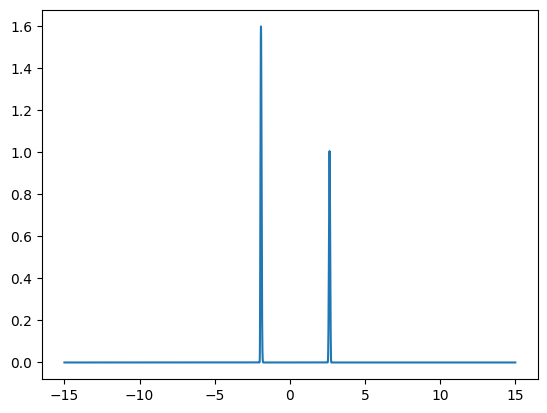

In [34]:
import matplotlib.pyplot as plt
x = np.linspace(-15, 15, 10000)
plt.plot(x, np.exp(sel_probs))

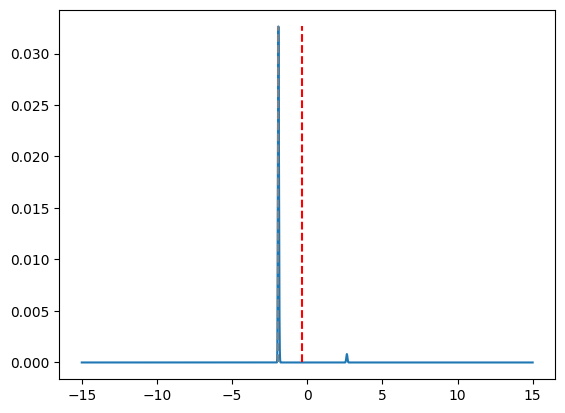

In [35]:
plt.plot(x, dist.pdf(theta=norm_contrast.dot(mu)))
plt.vlines(obs_tar, ymin=0, ymax=np.max(dist.pdf(theta=norm_contrast.dot(mu))),
           linestyles='--', colors='grey')
plt.vlines(norm_contrast.dot(mu), ymin=0, 
           ymax=np.max(dist.pdf(theta=norm_contrast.dot(mu))),
           linestyles='--', colors='red')

In [36]:
dist.ccdf(theta=norm_contrast.dot(mu), x=obs_tar)

np.float64(0.5549217152703473)

In [21]:
pval

np.float64(0.4291804635099677)

In [38]:
float("1")

1.0

In [22]:
(x > obs_tar).sum()

np.int64(3650)

In [23]:
(pivot_f, condl_density_f, contrast_f, norm_contrast_f,
 observed_target_f, logWeights_f, sel_probs_f) \
    = reg_tree.split_inference(node=reg_tree.root, 
                               ngrid=10000,
                               ncoarse=200,
                               grid_width=15,
                               sd=sd)

barr 437.2986370928145
obj -9792.57242878786
conjugate norm: 921.4084211032957
barr 442.2548025763548
obj -9254.334851784573
conjugate norm: 919.5161439294793
barr 441.55881948902356
obj -9428.628453673111
conjugate norm: 917.6536237205037
barr 435.96849684664045
obj -9701.34892111338
conjugate norm: 915.8203987579941
barr 441.77546234004205
obj -9310.364794403391
conjugate norm: 914.0160095885291
barr 447.93176793201826
obj -8602.545323525506
conjugate norm: 912.2399991927933
barr 438.43434817355865
obj -9499.402369257114
conjugate norm: 910.4919131532968
barr 441.4860310419715
obj -8998.80510868956
conjugate norm: 908.7712998205727
barr 434.04450286496194
obj -9557.017137183862
conjugate norm: 907.0777104777718
barr 438.7481714327463
obj -8966.193456526375
conjugate norm: 905.4106995035776
barr 436.9731196313778
obj -9502.794720721144
conjugate norm: 903.7698245333646
barr 436.1213012173413
obj -9207.869251361386
conjugate norm: 902.1546466185368
barr 442.24175738157174
obj -8769.838

KeyboardInterrupt: 

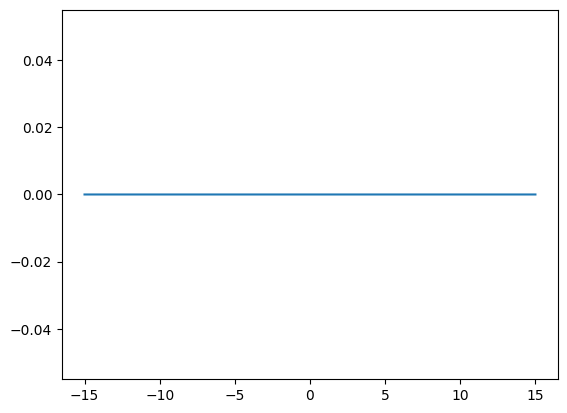

In [60]:
plt.plot(x, np.exp(sel_probs))

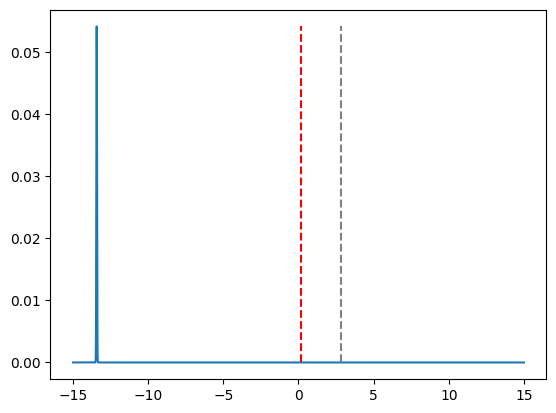

In [61]:
plt.plot(x, condl_density_f.pdf(theta=0))
plt.vlines(obs_tar, ymin=0, ymax=np.max(condl_density_f.pdf(theta=0)),
           linestyles='--', colors='grey')
plt.vlines(norm_contrast.dot(mu), ymin=0, 
           ymax=np.max(condl_density_f.pdf(theta=0)),
           linestyles='--', colors='red')

# Replicate Tree Value Simulations

In [19]:
X = np.random.normal(size=(100, 10))
a = 1
b = 1
mu = b* ( (X[:,0] <= 0) * (1 + a * (X[:,1] > 0) + (X[:,2] * X[:,1] <= 0)) )
y = mu + np.random.normal(size=(100,), scale=1)

In [31]:
# Create and train the regression tree
reg_tree = RegressionTree(min_samples_split=10, max_depth=10)
reg_tree.fit(X, y)

# Make predictions
predictions = reg_tree.predict(X)
#print(predictions)
reg_tree.print_branches()

 j: 0
 threshold: -0.026246156794562686
 left:
	 j: 8
	 threshold: -0.47691162512272384
	 left:
		 j: 6
		 threshold: -1.882026910030391
		 left:
		 right:
			 j: 5
			 threshold: -0.7006531475942253
			 left:
			 right:
	 right:
		 j: 1
		 threshold: -0.046286560689003074
		 left:
			 j: 4
			 threshold: -0.6951223438765441
			 left:
			 right:
				 j: 1
				 threshold: -1.7342866936815915
				 left:
				 right:
					 j: 9
					 threshold: -0.2666871517794296
					 left:
					 right:
		 right:
			 j: 1
			 threshold: 1.3119538813916485
			 left:
				 j: 5
				 threshold: 0.020045901693990745
				 left:
				 right:
			 right:
 right:
	 j: 6
	 threshold: 1.1256570637586534
	 left:
		 j: 4
		 threshold: 1.461856376611065
		 left:
			 j: 6
			 threshold: -1.7952845350243212
			 left:
			 right:
				 j: 4
				 threshold: -0.4259380811250433
				 left:
					 j: 1
					 threshold: 1.6819463364634613
					 left:
						 j: 8
						 threshold: -0.3066579992144446
						 left:
						 right:
				

# A Toy Example Showing the Symmetry in Selection Probabilities

Suppose $n=4$ and we want to divide a dataset based on one covariate $X$ where $X_1, X_2 \leq X_3, X_4$.

In [291]:
eta = np.array([-0.5, -0.5, 0.5,0.5])

In [298]:
P_perp = np.eye(4) - np.linalg.outer(eta, eta)/(np.linalg.norm(eta)**2)

In [299]:
Y = np.array([-5.5, -4.5, 1.5, 0.5])
mu = np.array([-5, -5, 1, 1])

In [300]:
P_perp @ Y

array([-2.5, -1.5, -1.5, -2.5])

In [301]:
reconstructed_Y = np.linalg.outer(eta, eta)/(np.linalg.norm(eta)**2) @ (-Y) + P_perp @ Y

In [302]:
reconstructed_Y

array([ 0.5,  1.5, -4.5, -5.5])

In [303]:
Y

array([-5.5, -4.5,  1.5,  0.5])

This means, in some cases, flipping sign of the inner product $\eta'Y$ will result in a $Y$ with the original left and right node being flipped, but if we calculate the gain, the gain will stay the same as the version using $\eta'Y$.

In [7]:
def k_dim_prec(k, sd_rand):
    prec = (np.eye(k) - np.ones((k, k))
            / ((k + 1))) / (sd_rand ** 2)
    return prec

In [8]:
def get_cond_dist(mean, cov, cond_idx, rem_idx, rem_val,
                  sd_rand, rem_dim):
    prec_rem = k_dim_prec(k=rem_dim, sd_rand=sd_rand)

    cond_mean = mean[cond_idx] + cov[np.ix_(cond_idx, rem_idx)].dot(prec_rem).dot(rem_val - mean[rem_idx])
    cond_cov = cov[np.ix_(cond_idx, cond_idx)] - cov[np.ix_(cond_idx, rem_idx)].dot(prec_rem).dot(
        cov[np.ix_(rem_idx, cond_idx)])
    cond_prec = np.linalg.inv(cond_cov)

    return cond_mean, cond_cov, cond_prec

In [9]:
k_dim_prec(100, 0.5)

array([[ 3.96039604, -0.03960396, -0.03960396, ..., -0.03960396,
        -0.03960396, -0.03960396],
       [-0.03960396,  3.96039604, -0.03960396, ..., -0.03960396,
        -0.03960396, -0.03960396],
       [-0.03960396, -0.03960396,  3.96039604, ..., -0.03960396,
        -0.03960396, -0.03960396],
       ...,
       [-0.03960396, -0.03960396, -0.03960396, ...,  3.96039604,
        -0.03960396, -0.03960396],
       [-0.03960396, -0.03960396, -0.03960396, ..., -0.03960396,
         3.96039604, -0.03960396],
       [-0.03960396, -0.03960396, -0.03960396, ..., -0.03960396,
        -0.03960396,  3.96039604]])